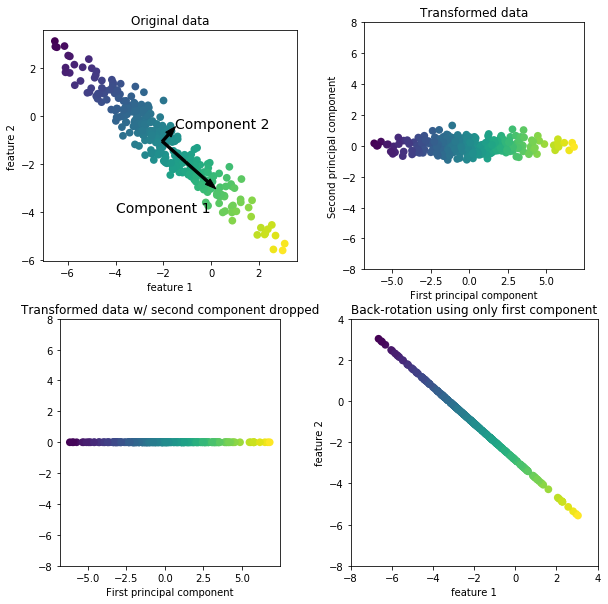

In [2]:
# 特徴量の抽出
import mglearn
from matplotlib import pyplot as plt

mglearn.plots.plot_pca_illustration()
plt.show()

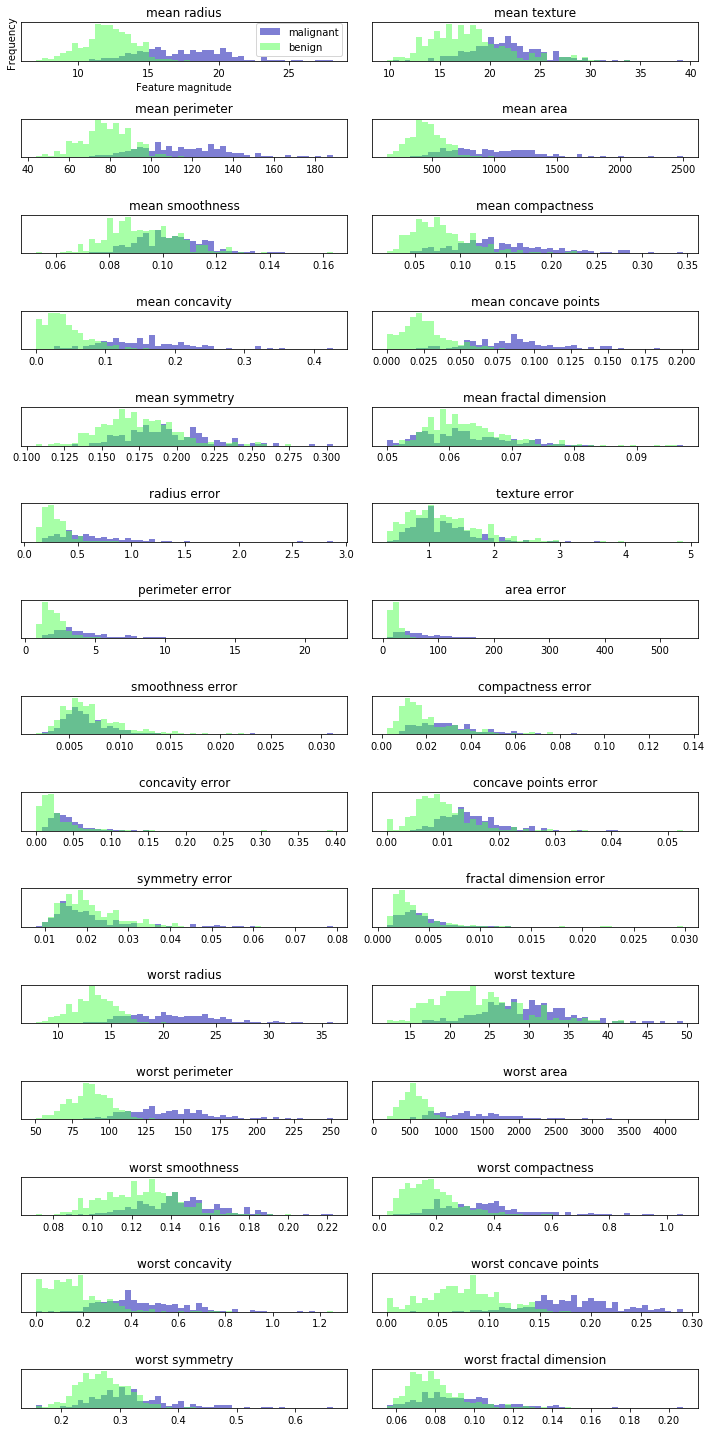

In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

(569, 30)
(569, 2)
PCA component shape :(2, 30)


Text(0,0.5,'principal component')

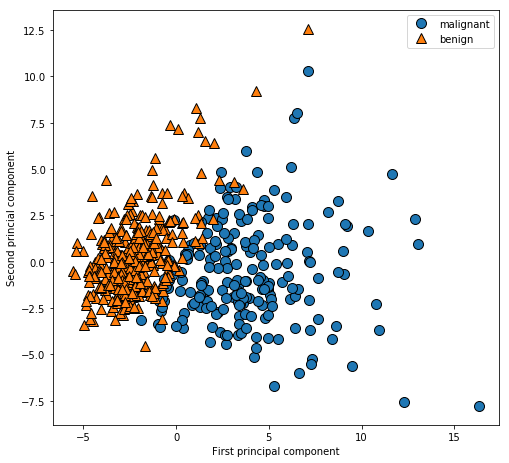

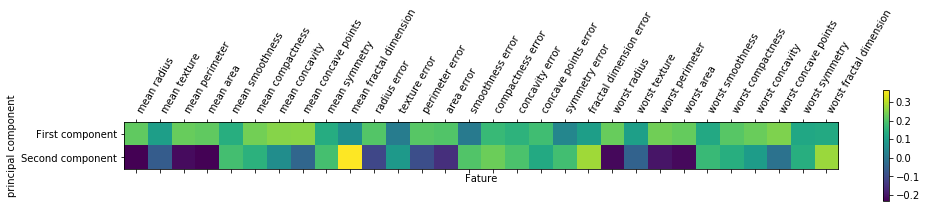

In [9]:
# 個々の特徴量の分散が1になるようにする
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import mglearn
from matplotlib import pyplot as plt

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

#通常のPCAではデータの回転とシフトしか行われないため、次元削減は別途行う

# データの最初の2つの主成分だけ維持する
pca = PCA(n_components=2)
# cancer データ・セットにPCAモデルを適合
pca.fit(X_scaled)

# 最初の2つの主成分に対してデータポイントを変換
X_pca = pca.transform(X_scaled)
print(str(X_scaled.shape)) #もとの形
print(str(X_pca.shape)) # 削減後の形

plt.figure(figsize=(8, 8))

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second princial component')

# 便利なのだが、プロットされた軸がどれか判断しにくい
print(f"PCA component shape :{pca.components_.shape}")

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Fature')
plt.ylabel('principal component')

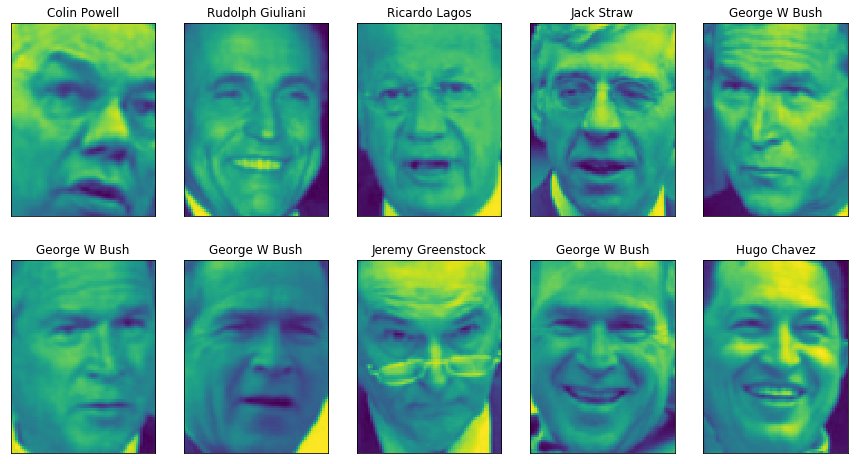

(2886, 87, 65)
['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Ariel Sharon' 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee'
 'Bill Clinton' 'Carlos Menem' 'Colin Powell' 'David Beckham'
 'Donald Rumsfeld' 'George Robertson' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gray Davis' 'Hamid Karzai' 'Hans Blix'
 'Hugo Chavez' 'Igor Ivanov' 'Jack Straw' 'Jacques Chirac' 'Jean Chretien'
 'Jennifer Aniston' 'Jennifer Capriati' 'Jennifer Lopez'
 'Jeremy Greenstock' 'Jiang Zemin' 'John Ashcroft' 'John Negroponte'
 'Jose Maria Aznar' 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan'
 'Laura Bush' 'Lindsay Davenport' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Mahmoud Abbas' 'Megawati Sukarnoputri'
 'Michael Bloomberg' 'Naomi Watts' 'Pete Sampras' 'Ricardo Lagos'
 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein' 'Serena Williams'
 'Silvio Berlusconi' 'Tiger Woods' 'Tom Daschle' 'Tom Ridge' 'Tony Blair'
 'Vicente Fox' 'Vladimir Putin' 'Winona Ryder

In [14]:
# 特徴量抽出を顔画像に適用する
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

plt.show()

print(people.images.shape)
print(people.target_names)

# データに偏りがあるので、各人の画像を50枚までに制限する
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
Y_people = people.target[mask]

# 0から255までではなく、グレースケールの0〜1に変換
X_people = X_people / 255.

0.24688796680497926
(1444, 100)


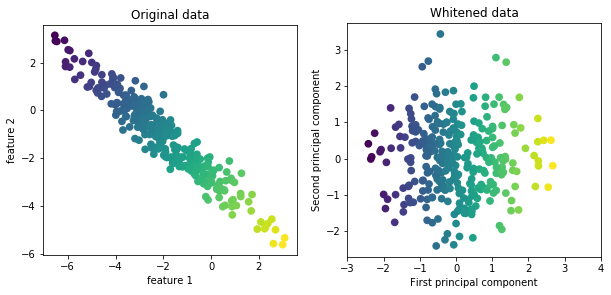

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.decomposition import PCA

# 訓練セットとテストセットにデータを分類
X_train, X_test, y_train, y_test = train_test_split(X_people, Y_people, stratify=Y_people, random_state=0)
# K最近傍法で1-最近傍で構築
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

# 主成分に沿った距離を使うことで精度が上げられないかを試す
# 主成分が同じスケールになるようにスケール変換を施す
mglearn.plots.plot_pca_whitening()

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# 100の特徴量を持つ
print(X_train_pca.shape)

0.35269709543568467
(100, 5655)
________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.4     , ..., 0.556863],
       ...,
       [0.909804, ..., 0.160784]], dtype=float32), 
array([[0.222222, ..., 0.252288],
       ...,
       [0.698039, ..., 0.852288]], dtype=float32))
_______________________________________________________pca_faces - 11.9s, 0.2min


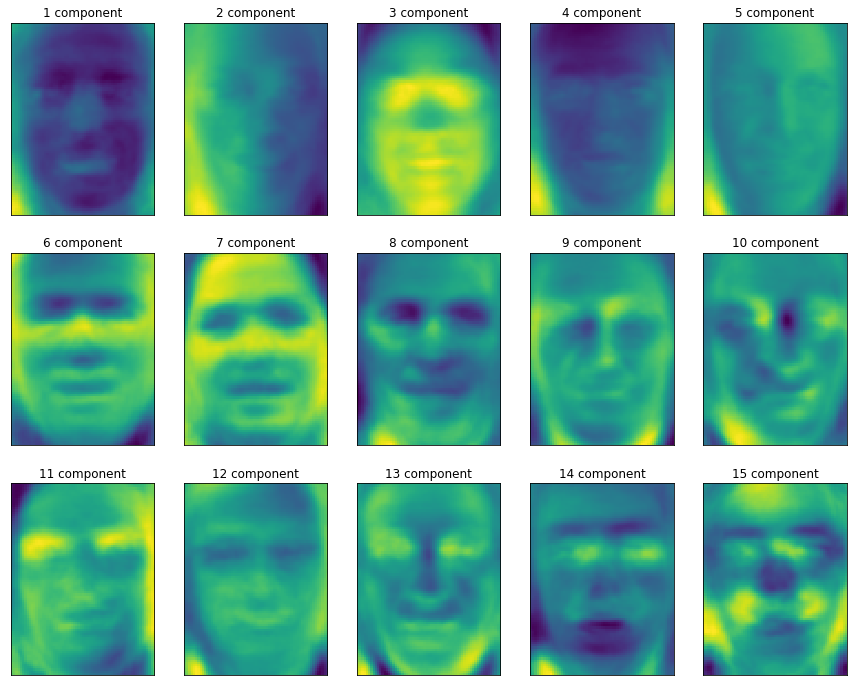

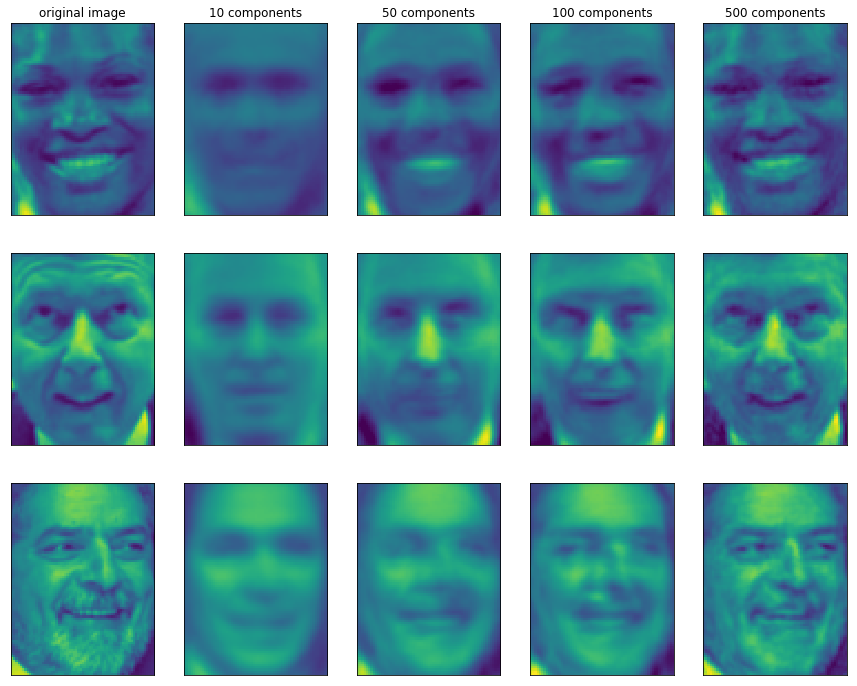

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# 訓練セットとテストセットにデータを分類
X_train, X_test, y_train, y_test = train_test_split(X_people, Y_people, stratify=Y_people, random_state=0)

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print(knn.score(X_test_pca, y_test))
print(pca.components_.shape)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f"{i + 1} component")

mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)